# Stroke Data Implementation 1

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import lightgbm
from sklearn.metrics import f1_score
import xgboost as xgb

In [15]:
# Read in preprocessed data
x_train = pd.read_csv('data/x_train.csv')
x_test = pd.read_csv('data/x_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

## LightGBM Model



In [16]:
#
# Create the LightGBM data containers
#
train_data = lightgbm.Dataset(x_train, label=y_train, params={"max_bin":100})
test_data = lightgbm.Dataset(x_test, label=y_test, params={"max_bin":100})


In [17]:
# F1 score evaluation function
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

evals_result = {}

### Test with defaults

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's f1: 0
Training until validation scores don't improve for 100 rounds
[2]	valid_0's f1: 0
[3]	valid_0's f1: 0
[4]	valid_0's f1: 0
[5]	valid_0's f1: 0
[6]	valid_0's f1: 0.0877193
[7]	valid_0's f1: 0.294643
[8]	valid_0's f1: 0.302326
[9]	valid_0's f1: 0.315789
[10]	valid_0's f1: 0.318937
[11]	valid_0's f1: 0.322368
[12]	valid_0's f1: 0.321311
[13]	valid_0's f1: 0.333333
[14]	valid_0's f1: 0.309677
[15]	valid_0's f1: 0.319218
[16]	valid_0's f1: 0.337662
[17]	valid_0's f1: 0.324841
[18]	valid_0's f1: 0.321543
[19]	valid_0's f1: 0.315113
[20]	valid_0's f1: 0.298701
[21]	valid_0's f1: 0.313725
[22]	valid_0's f1: 0.308176
[23]	valid_0's f1: 0.302251
[24]	valid_0's f1: 0.306189
[25]	valid_0's f1: 0.302632
[26]	valid_0's f1: 0.299003
[27]	valid_0's f1: 0.302013
[28]	valid_0's f1: 0.30303
[29]	valid_0's f1: 0.300341
[30]	valid

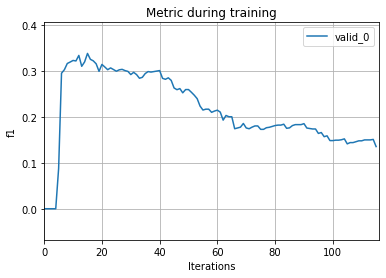

In [18]:
#
# Train the model
#

parameters = {
    'objective': 'binary',
    'is_unbalance': 'true',
    'metric': 'custom',
    'force_col_wise': 'true',
    'verbose': 0}

model = lightgbm.train(parameters,
                       train_data,
                       feval=lgb_f1_score,
                       evals_result=evals_result,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

lightgbm.plot_metric(evals_result, metric='f1')

### Tweak hyperparameters

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's f1: 0
[2]	valid_0's f1: 0
[3]	valid_0's f1: 0
[4]	valid_0's f1: 0.037037
[5]	valid_0's f1: 0.252427
[6]	valid_0's f1: 0.268293
[7]	valid_0's f1: 0.285714
[8]	valid_0's f1: 0.303279
[9]	valid_0's f1: 0.299652
[10]	valid_0's f1: 0.309148
[11]	valid_0's f1: 0.297214
[12]	valid_0's f1: 0.314103
[13]	valid_0's f1: 0.304094
[14]	valid_0's f1: 0.308571
[15]	valid_0's f1: 0.302521
[16]	valid_0's f1: 0.295699
[17]	valid_0's f1: 0.291005
[18]	valid_0's f1: 0.303191
[19]	valid_0's f1: 0.300268
[20]	valid_0's f1: 0.301075
[21]	valid_0's f1: 0.304348
[22]	valid_0's f1: 0.305177
[23]	valid_0's f1: 0.304813
[24]	valid_0's f1: 0.309783
[25]	valid_0's f1: 0.309392
[26]	valid_0's f1: 0.308989
[27]	valid_0's f1: 0.295455
[28]	valid_0's f1: 0.293785
[29]	valid_0's f1: 0.292264
[30]	valid_0's f1: 0.306358
[31]	valid_0's f1: 0.304094

C:\Users\eogha\Anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[32]	valid_0's f1: 0.305882
[33]	valid_0's f1: 0.318584
[34]	valid_0's f1: 0.308605
[35]	valid_0's f1: 0.304478
[36]	valid_0's f1: 0.306306
[37]	valid_0's f1: 0.292683
[38]	valid_0's f1: 0.290123
[39]	valid_0's f1: 0.278481
[40]	valid_0's f1: 0.285714
[41]	valid_0's f1: 0.28754
[42]	valid_0's f1: 0.279221
[43]	valid_0's f1: 0.279221
[44]	valid_0's f1: 0.272727
[45]	valid_0's f1: 0.263158
[46]	valid_0's f1: 0.278481
[47]	valid_0's f1: 0.283912
[48]	valid_0's f1: 0.268371
[49]	valid_0's f1: 0.270096
[50]	valid_0's f1: 0.270096
[51]	valid_0's f1: 0.281046
[52]	valid_0's f1: 0.279221
[53]	valid_0's f1: 0.277228
[54]	valid_0's f1: 0.273616
[55]	valid_0's f1: 0.270627
[56]	valid_0's f1: 0.264901
[57]	valid_0's f1: 0.27027
[58]	valid_0's f1: 0.273616
[59]	valid_0's f1: 0.270627
[60]	valid_0's f1: 0.283784
[61]	valid_0's f1: 0.28481
[62]	valid_0's f1: 0.285714
[63]	valid_0's f1: 0.28115
[64]	valid_0's f1: 0.291262
[65]	valid_0's f1: 0.290323
[66]	valid_0's f1: 0.281967
[67]	valid_0's f1: 0.28

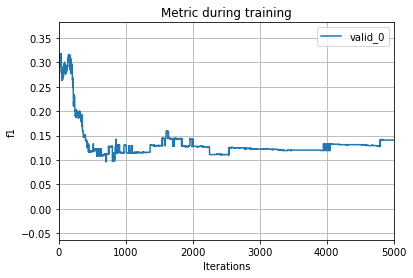

In [19]:
#
# Train the model
#

evals_result = {}

parameters = {
    'boosting': 'dart',
    'objective': 'binary',
    'scale_pos_weight': 99,
    'metric': 'custom',
    'num_leaves': 70,
    'force_col_wise':'true',
    'bagging_freq': 50,
    'verbose': 0
    }

model = lightgbm.train(parameters,
                       train_data,
                       feval=lgb_f1_score,
                       evals_result=evals_result,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

lightgbm.plot_metric(evals_result, metric='f1')

## XGBoost

### Default parameters

In [28]:
# read in data
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [29]:
# specify parameters via map
param = {
    'max_depth':2,
    'eta':1,
    'objective':'binary:hinge'
    }
num_round = 2
bst = xgb.train(
    param,
    dtrain,
    num_round,
    feval=lgb_f1_score,
    evals_result=evals_result)
# make prediction
preds = bst.predict(dtest)

In [30]:
#xgb.plot_metric(evals_result, metric='f1')
#print(evals_result)
evals_result

{'valid_0': OrderedDict([('f1',
               [0.0,
                0.0,
                0.0,
                0.037037037037037035,
                0.2524271844660194,
                0.2682926829268293,
                0.2857142857142857,
                0.30327868852459017,
                0.29965156794425085,
                0.3091482649842271,
                0.29721362229102166,
                0.3141025641025641,
                0.30409356725146197,
                0.30857142857142855,
                0.3025210084033613,
                0.29569892473118276,
                0.291005291005291,
                0.30319148936170215,
                0.30026809651474534,
                0.3010752688172043,
                0.3043478260869565,
                0.30517711171662126,
                0.3048128342245989,
                0.30978260869565216,
                0.30939226519337015,
                0.3089887640449438,
                0.29545454545454547,
                0.2937853107